# Predicting Survival in the Titanic
By Luis Alberto Denis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
raw_train = pd.read_csv('data/train.csv')
raw_test = pd.read_csv('data/test.csv')

In [3]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_train.info()
print('-'*40)
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
correlation = raw_train.corr()['Survived']

In [7]:
correlation.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Survival Analysis

In [8]:
raw_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Feature Name Analysis

In [9]:
raw_train['Name'].unique().size

891

In [10]:
raw_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

## Feature Sex Analysis

In [11]:
raw_train[['Sex', 'PassengerId']].groupby(['Sex'], as_index=True).count()

,PassengerId
Sex,
female,314
male,577


In [12]:
raw_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


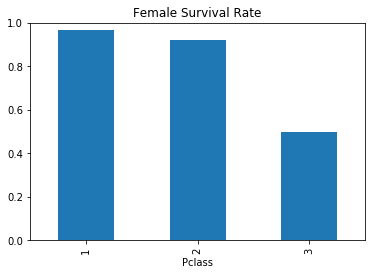

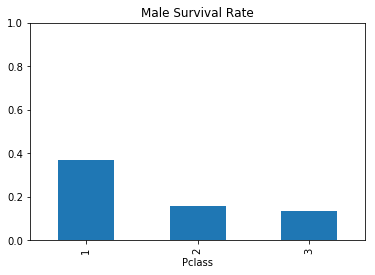

In [13]:
data_sex = raw_train[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass'], as_index=True).mean()

data_sex.loc['female'].plot(kind='bar', ylim=[0, 1], title='Female Survival Rate', legend=False)
data_sex.loc['male'].plot(kind='bar', ylim=[0, 1], title='Male Survival Rate', legend=False)

## Feature Pclass Analysis

In [14]:
data_pclass = raw_train[['Pclass', 'PassengerId']].groupby(['Pclass'], as_index=True).count()
data_pclass

,PassengerId
Pclass,
1,216
2,184
3,491


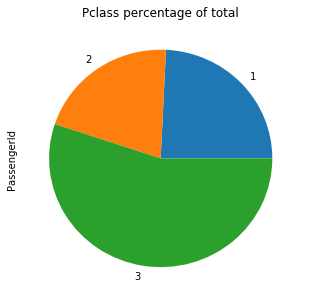

In [15]:
data_pclass.plot(kind='pie', y='PassengerId', legend=False, title='Pclass percentage of total', figsize=(5, 5))

In [16]:
raw_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Feature Fare Analysis

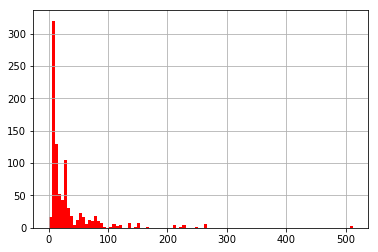

In [17]:
raw_train['Fare'].hist(bins=100, color='red')

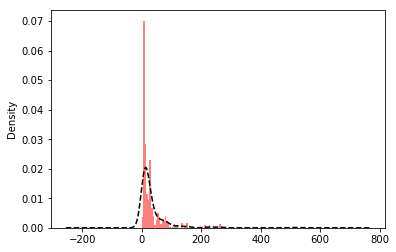

In [18]:
raw_train['Fare'].hist(bins=100, normed=True, alpha=0.5, color='red')
raw_train['Fare'].plot(kind='kde', style='k--')

In [19]:
raw_train['Fare'].skew()

4.787316519674893

{'boxes': [<matplotlib.lines.Line2D at 0x228a70cf828>],
 'caps': [<matplotlib.lines.Line2D at 0x228a70d9ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x228a70e8ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x228a70dfc18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x228a70cf9e8>,
  <matplotlib.lines.Line2D at 0x228a70d99e8>]}

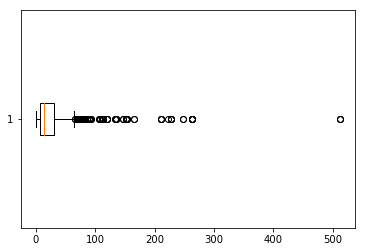

In [20]:
plt.boxplot(raw_train['Fare'], vert=False)

In [21]:
raw_train.loc[raw_train['Fare'] > 100, 'Pclass'].value_counts()

1    53
Name: Pclass, dtype: int64

In [22]:
raw_train.loc[raw_train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## Feature SibSp Analysis

In [23]:
raw_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

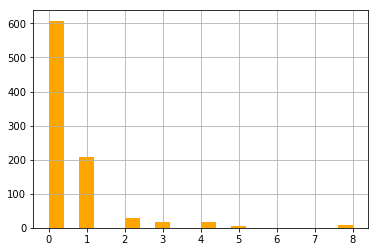

In [24]:
raw_train['SibSp'].hist(bins=20, color='orange')

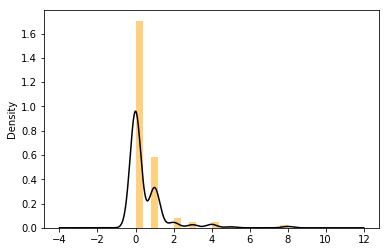

In [25]:
raw_train['SibSp'].hist(bins=20, color='orange', normed=True, alpha=0.5)
raw_train['SibSp'].plot(kind='kde', color='black')

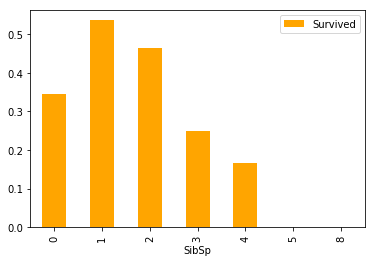

In [26]:
data_sibsp = raw_train[['SibSp', 'Survived']].groupby('SibSp', as_index=True).mean()
data_sibsp.plot(kind='bar', color='orange')

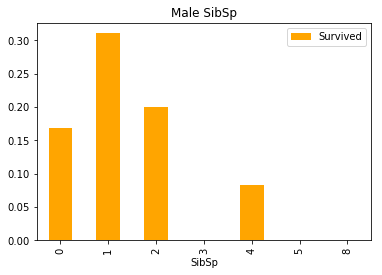

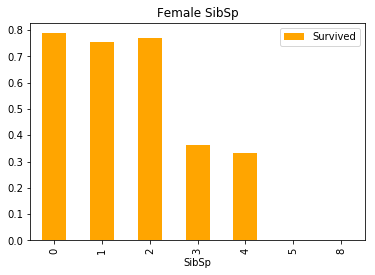

In [27]:
data_sibsp = raw_train[['SibSp', 'Sex', 'Survived']].groupby(['Sex', 'SibSp'], as_index=True).mean()
data_sibsp.loc['male'].plot(kind='bar', color='orange', title='Male SibSp')
data_sibsp.loc['female'].plot(kind='bar', color='orange', title='Female SibSp')

## Feature Parch Analysis

In [28]:
raw_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

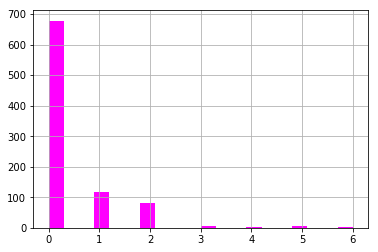

In [29]:
raw_train['Parch'].hist(bins=20, color='magenta')

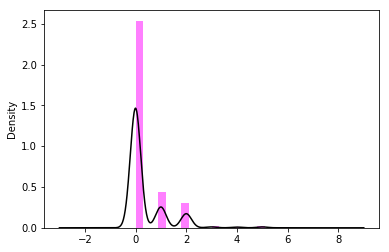

In [30]:
raw_train['Parch'].hist(bins=20, color='magenta', normed=True, alpha=0.5)
raw_train['Parch'].plot(kind='kde', color='black')

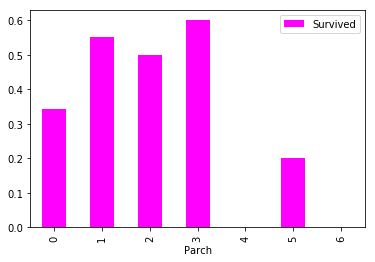

In [31]:
data_parch = raw_train[['Parch', 'Survived']].groupby('Parch', as_index=True).mean()
data_parch.plot(kind='bar', color='magenta')

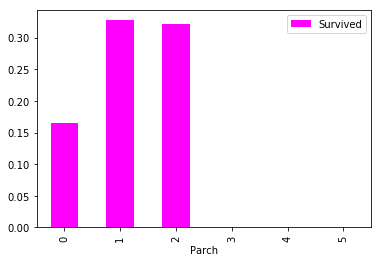

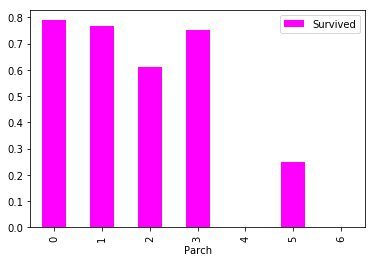

In [32]:
data_parch = raw_train[['Parch', 'Sex', 'Survived']].groupby(['Sex', 'Parch'], as_index=True).mean()
data_parch.loc['male'].plot(kind='bar', color='magenta')
data_parch.loc['female'].plot(kind='bar', color='magenta')

## Feature Age Analysis

In [33]:
raw_train['Age'].isnull().sum()

177

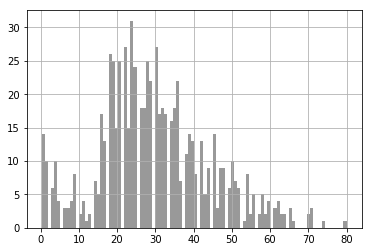

In [34]:
raw_train['Age'].hist(bins=100, grid=True, alpha=0.8, color='gray')

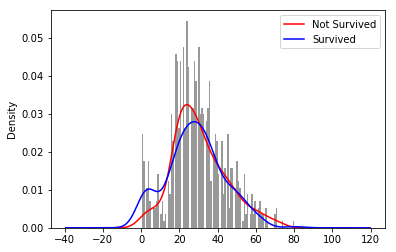

In [35]:
raw_train['Age'].hist(bins=100, grid=True, alpha=0.8, normed=True, color='gray')
raw_train.loc[raw_train['Survived']==0, 'Age'].plot(kind='kde', color='red', label='Not Survived', legend=True)
raw_train.loc[raw_train['Survived']==1, 'Age'].plot(kind='kde', color='blue', label='Survived', legend=True)

## Feature Embarked Analysis

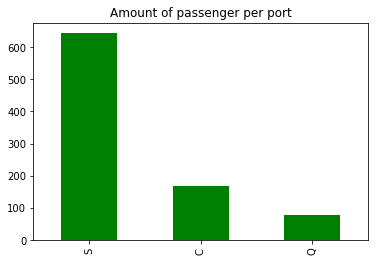

In [36]:
raw_train['Embarked'].value_counts().plot(kind='bar', title='Amount of passenger per port', color='g')

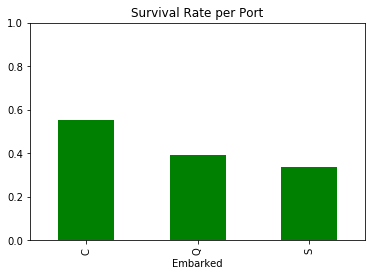

In [37]:
data_embarked = raw_train[['Embarked', 'Survived']].groupby('Embarked').mean()
data_embarked.plot(kind='bar', ylim=[0, 1], legend=False, title='Survival Rate per Port', color='g')

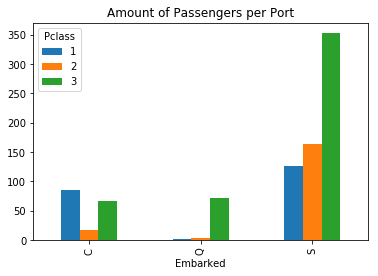

In [38]:
pd.crosstab(raw_train['Embarked'], raw_train['Pclass']).plot(kind='bar', title='Amount of Passengers per Port')

## Feature Ticket Analysis

In [39]:
raw_train['Ticket'].unique().size

681

In [40]:
raw_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

## Feature Cabin Analysis

In [41]:
raw_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [42]:
raw_train.loc[raw_train['Cabin'].isnull(), 'Cabin'].size

687

## Filling of Missing Values in Fare

In [43]:
from sklearn.preprocessing import Imputer

In [44]:
fare_imputer = Imputer(strategy='median')
fare_imputer.fit(raw_train['Fare'].values.reshape(-1, 1))

raw_test['Fare'] = fare_imputer.transform(raw_test['Fare'].values.reshape(-1, 1))

## Feature LogFare

In [45]:
raw_train['LogFare'] = raw_train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

raw_test['LogFare'] = raw_test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

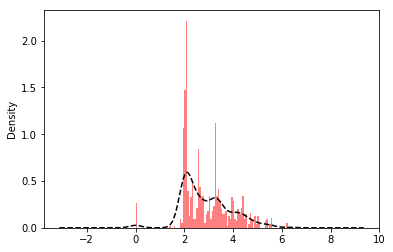

In [46]:
raw_train['LogFare'].hist(bins=100, normed=True, alpha=0.5, color='red')
raw_train['LogFare'].plot(kind='kde', style='k--')

In [47]:
raw_train['LogFare'].skew()

0.44310881405404506

## Filling of Missing Values in Cabin

In [48]:
raw_train['Cabin'] = raw_train['Cabin'].fillna('U') #Unknown

raw_test['Cabin'] = raw_test['Cabin'].fillna('U')

## Feature Deck

In [49]:
raw_train['Deck'] = raw_train['Cabin'].apply(lambda x: x[0])

raw_test['Deck'] = raw_test['Cabin'].apply(lambda x: x[0])

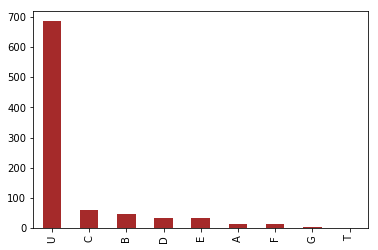

In [50]:
raw_train['Deck'].value_counts().plot(kind='bar', color='brown')

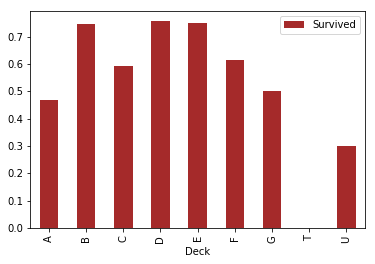

In [51]:
raw_train[['Deck', 'Survived']].groupby('Deck').mean().plot(kind='bar', color='brown')

## Feature Title

In [52]:
def extract_title_from_name(name):
    for word in name.split():
        if word.endswith('.') and len(word) > 2: return word[:-1]
    return None

raw_train['Title'] = raw_train['Name'].apply(lambda x: extract_title_from_name(x))

raw_test['Title'] = raw_test['Name'].apply(lambda x: extract_title_from_name(x))

raw_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [53]:
raw_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'], dtype=object)

In [54]:
pd.crosstab(raw_train['Title'], raw_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [55]:
raw_train.loc[(raw_train['Title']=='Dr') & (raw_train['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Title
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,3.25537,D,Dr


In [56]:
title_mapping = {'Capt':'Mr', 'Col':'Mr','Don':'Mr','Dona':'Mrs',
                 'Dr':'Mr','Jonkheer':'Mr','Lady':'Mrs','Major':'Mr',
                 'Master':'Master','Miss':'Miss','Mlle':'Miss','Mme':'Mrs',
                 'Mr':'Mr','Mrs':'Mrs','Ms':'Miss','Rev':'Mr','Sir':'Mr',
                 'Countess':'Mrs'}

raw_train.loc[(raw_train['Title']=='Dr') & (raw_train['Sex']=='female'),'Title'] = 'Mrs'
raw_train['Title'] = raw_train['Title'].map(title_mapping)

raw_test['Title'] = raw_test['Title'].map(title_mapping)

## Filling of Missing Values in Age

In [57]:
raw_train[raw_train['Age'].isnull()]['Title'].value_counts()

Mr        120
Miss       36
Mrs        17
Master      4
Name: Title, dtype: int64

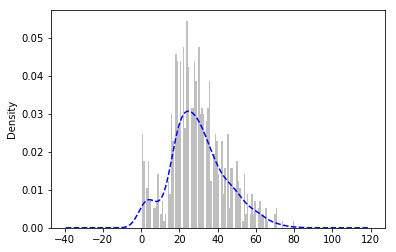

In [58]:
raw_train['Age'].hist(bins=100, normed=True, alpha=0.5, color='gray')
raw_train['Age'].plot(kind='kde', style='b--')

In [59]:
ages = dict()

for title in raw_train['Title'].unique():
    ages[title] = dict()

for title in ages.keys():    
    for pclass in raw_train['Pclass'].unique():
        ages[title][pclass] = raw_train[(raw_train['Title'] == title) & (raw_train['Pclass'] == pclass)]['Age'].median()

ages

{'Master': {1: 4.0, 2: 1.0, 3: 4.0},
 'Miss': {1: 30.0, 2: 24.0, 3: 18.0},
 'Mr': {1: 42.0, 2: 31.0, 3: 26.0},
 'Mrs': {1: 41.5, 2: 32.0, 3: 31.0}}

In [60]:
raw_train['Age'] = raw_train['Age'].fillna(-1)
for index, row in raw_train.iterrows():
    if row['Age'] == -1:
        raw_train.loc[index, 'Age'] = ages[row['Title']][row['Pclass']]
        
raw_test['Age'] = raw_test['Age'].fillna(-1)
for index, row in raw_test.iterrows():
    if row['Age'] == -1:
        raw_test.loc[index, 'Age'] = ages[row['Title']][row['Pclass']]

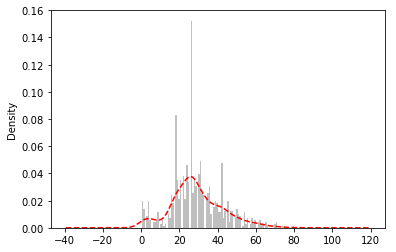

In [61]:
raw_train['Age'].hist(bins=100, normed=True, alpha=0.5, color='gray')
raw_train['Age'].plot(kind='kde', style='r--')

## Filling of Missing Values in Embarked

In [62]:
raw_train.loc[raw_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare,Deck,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,4.382027,B,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,4.382027,B,Mrs


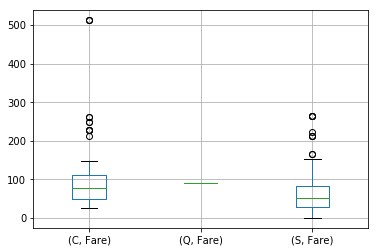

In [63]:
filling_data = raw_train.loc[raw_train['Pclass'] == 1, ['Fare', 'Embarked']].groupby('Embarked', as_index=True)
filling_data.boxplot(subplots=False)

In [64]:
raw_train['Embarked'] = raw_train['Embarked'].fillna('C')

In [65]:
raw_train['Embarked'].count()

891

## Feature Male

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
bin_sex = LabelEncoder()
raw_train['Male'] = bin_sex.fit_transform(raw_train['Sex'])

raw_test['Male'] = bin_sex.transform(raw_test['Sex'])

In [68]:
raw_train['Male'].value_counts()

1    577
0    314
Name: Male, dtype: int64

## Feature FamilyMembers

In [69]:
raw_train['FamilyMembers'] = raw_train['SibSp'] + raw_train['Parch']

raw_test['FamilyMembers'] = raw_test['SibSp'] + raw_test['Parch']

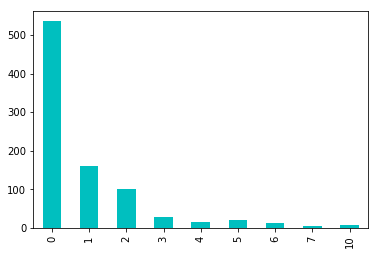

In [70]:
raw_train['FamilyMembers'].value_counts().sort_index().plot(kind='bar',  legend=False, color='c')

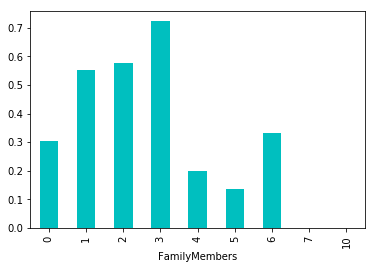

In [71]:
raw_train[['FamilyMembers', 'Survived']].groupby('FamilyMembers').mean().plot(kind='bar', legend=False, color='c')

## Binning Feature FamilyMembers into FamiySize

In [72]:
def binning_family(x):
    if x == 0:
        return 'Alone'
    elif (x > 0) & (x <= 3):
        return 'Small'
    elif (x > 3):
        return 'Large'

raw_train['FamilySize'] = raw_train['FamilyMembers'].apply(lambda x: binning_family(x))

raw_test['FamilySize'] = raw_test['FamilyMembers'].apply(lambda x: binning_family(x))

In [73]:
raw_train['FamilySize'].value_counts()

Alone    537
Small    292
Large     62
Name: FamilySize, dtype: int64

## Categorical Embarked into Dummies

In [74]:
from sklearn.preprocessing import LabelBinarizer

In [75]:
bin_embarked = LabelBinarizer()

ports = bin_embarked.fit_transform(raw_train['Embarked'])
ports_df = pd.DataFrame(ports, columns=['Port_' + p for p in bin_embarked.classes_.tolist()])
raw_train = raw_train.join(ports_df)

ports = bin_embarked.transform(raw_test['Embarked'])
ports_df = pd.DataFrame(ports, columns=['Port_' + p for p in bin_embarked.classes_.tolist()])
raw_test = raw_test.join(ports_df)

## Categorical FamilySize into Dummies

In [76]:
bin_fsize = LabelBinarizer()

fsize = bin_fsize.fit_transform(raw_train['FamilySize'])
fsize_df = pd.DataFrame(fsize, columns=['FamilySize_' + f for f in bin_fsize.classes_.tolist()])
raw_train = raw_train.join(fsize_df)

fsize = bin_fsize.transform(raw_test['FamilySize'])
fsize_df = pd.DataFrame(fsize, columns=['FamilySize_' + f for f in bin_fsize.classes_.tolist()])
raw_test = raw_test.join(fsize_df)

## Categorical Deck into Dummies

In [77]:
bin_deck = LabelBinarizer()

decks = bin_deck.fit_transform(raw_train['Deck'])
decks_df = pd.DataFrame(decks, columns=['Deck_' + d for d in bin_deck.classes_.tolist()])
raw_train = raw_train.join(decks_df)

decks = bin_deck.transform(raw_test['Deck'])
decks_df = pd.DataFrame(decks, columns=['Deck_' + d for d in bin_deck.classes_.tolist()])
raw_test = raw_test.join(decks_df)

## Scaling of Feature Age

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
#age_scaler = MinMaxScaler()
#raw_train['Age'] = age_scaler.fit_transform(raw_train['Age'].values.reshape(-1, 1))

#raw_test['Age'] = age_scaler.transform(raw_test['Age'].values.reshape(-1, 1))

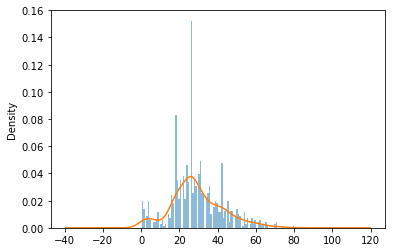

In [80]:
raw_train['Age'].hist(bins=100, normed=True, alpha=0.5)
raw_train['Age'].plot(kind='kde')

## Removing Features

In [81]:
train = raw_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Title', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'FamilyMembers', 'FamilySize', 'Deck', 'Fare'], axis=1)
test = raw_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Title', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'FamilyMembers', 'FamilySize', 'Deck', 'Fare'], axis=1)

In [82]:
train.head()

,Survived,Pclass,Age,LogFare,Male,Port_C,Port_Q,Port_S,FamilySize_Alone,FamilySize_Large,FamilySize_Small,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,22.0,1.981001,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,38.0,4.266662,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,1,3,26.0,2.070022,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,3.972177,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,35.0,2.085672,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [83]:
test.tail()

,Pclass,Age,LogFare,Male,Port_C,Port_Q,Port_S,FamilySize_Alone,FamilySize_Large,FamilySize_Small,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
413,3,26.0,2.085672,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
414,1,39.0,4.690430,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
415,3,38.5,1.981001,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
416,3,26.0,2.085672,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
417,3,4.0,3.107198,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Correlation with Survived

In [84]:
corr_with_survived = train.corrwith(train['Survived'])
corr_with_survived

Survived            1.000000
Pclass             -0.338481
Age                -0.061786
LogFare             0.331805
Male               -0.543351
Port_C              0.174718
Port_Q              0.003650
Port_S             -0.155660
FamilySize_Alone   -0.203367
FamilySize_Large   -0.125147
FamilySize_Small    0.279855
Deck_A              0.022287
Deck_B              0.175095
Deck_C              0.114652
Deck_D              0.150716
Deck_E              0.145321
Deck_F              0.057935
Deck_G              0.016040
Deck_T             -0.026456
Deck_U             -0.316912
dtype: float64

## Model Selection

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [86]:
y = train['Survived']
X = train.drop('Survived', axis=1)

In [87]:
seed = 4

In [88]:
gradientb = GradientBoostingClassifier(random_state=seed)
scores_mlp = cross_val_score(gradientb, X, y, cv=10)

In [89]:
rforest = RandomForestClassifier(random_state=seed)
scores_rf = cross_val_score(rforest, X, y, cv=10)

In [90]:
logistic_r = LogisticRegression(random_state=seed)
scores_lr = cross_val_score(logistic_r, X, y, cv=10)

In [91]:
support_v = SVC(random_state=seed)
scores_sv = cross_val_score(support_v, X, y, cv=10)

In [92]:
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X, y, cv=10)

In [93]:
list_scores = [
    scores_mlp.mean(), 
    scores_rf.mean(), 
    scores_lr.mean(), 
    scores_sv.mean(), 
    scores_knn.mean()
]
list_std = [
    scores_mlp.std(),
    scores_rf.std(),
    scores_lr.std(),
    scores_sv.std(),
    scores_knn.std()
]
columns = [
    'GradientBoosting',
    'RandomForest',
    'LogisticRegression',
    'SupportVector',
    'KNearestNeighbors'
]

scores = pd.DataFrame(columns=columns)
scores.loc['scores'] = list_scores
scores.loc['std'] = list_std
scores

,GradientBoosting,RandomForest,LogisticRegression,SupportVector,KNearestNeighbors
scores,0.839572,0.803629,0.820407,0.818235,0.751978
std,0.035916,0.039160,0.020852,0.036434,0.044883


## Fine-Tune the Hyperparameters

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_gb = {
    'loss' : ["deviance"],
    'n_estimators' : [50, 75, 100,200,300, 400],
    'learning_rate': [0.1, 0.7, 0.05, 0.03, 0.01],
    'max_depth': [4, 8, None],
    'min_samples_leaf': [25, 50, 75, 100],
    'max_features': [1.0, 0.3, 0.1] 
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=seed), param_gb, cv=10, n_jobs=-1)
grid_search_gb.fit(X, y)
grid_search_gb.best_params_

{'learning_rate': 0.7,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 0.3,
 'min_samples_leaf': 50,
 'n_estimators': 100}

In [96]:
param_rf = {
    "max_depth": [5, 8, 15, 25, None],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [5, 10, 25, 50],
    "max_features": ['log2', 'sqrt', None],
    "n_estimators": [50, 100, 150]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=seed), param_rf, cv=10, n_jobs=-1)
grid_search_rf.fit(X, y)
grid_search_rf.best_params_

{'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [97]:
param_lr = {
    "penalty": ["l2"],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=seed), param_lr, cv=10, n_jobs=-1)
grid_search_lr.fit(X, y)
grid_search_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [98]:
param_sv = {
    "kernel": ['rbf'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "gamma": [0.001, 0.01, 0.1, 1]
}

grid_search_sv = GridSearchCV(SVC(probability=True, random_state=seed), param_sv, cv=10, n_jobs=-1)
grid_search_sv.fit(X, y)
grid_search_sv.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [99]:
param_knn = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "p": [2, 3],
    "weights": ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=10, n_jobs=-1)
grid_search_knn.fit(X, y)
grid_search_knn.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

In [100]:
list_scores_tuning = [grid_search_gb.best_score_, grid_search_rf.best_score_, grid_search_lr.best_score_, grid_search_sv.best_score_, grid_search_knn.best_score_]
index_tuning = ['GradientBoosting', 'RandomForest', 'LogisticRegression', 'SupportVector', 'KNearestNeighbors']
scores_tuning = pd.Series(list_scores_tuning, index=index_tuning)
scores_tuning.sort_values(ascending=False)

GradientBoosting      0.843996
RandomForest          0.837262
SupportVector         0.836139
LogisticRegression    0.822671
KNearestNeighbors     0.777778
dtype: float64

## Evaluating the Model

In [104]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ('gb', grid_search_gb.best_estimator_),
    ('rf', grid_search_rf.best_estimator_),
    ('lr', grid_search_lr.best_estimator_),
    ('sv', grid_search_sv.best_estimator_),
    #('knn', grid_search_knn.best_estimator_)
]

voting_classifier = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
cross_val_score(voting_classifier, X, y, cv=10).mean()

0.83727414595392113

## Making predictions

In [105]:
voting_classifier = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_classifier.fit(X, y)
predictions = voting_classifier.predict(test)

In [106]:
submission = pd.DataFrame({
        "PassengerId": raw_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('predictions.csv', index=False)